## Analysis of 10000 mesh network
### 1. plot the connection
### 2. plot the voltage


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

location_file = "/home/zmd/Snudda/10000Sim/simulation_soma_10s/3d_point_location.txt"
connection_file = "/home/zmd/Snudda/10000Sim/simulation_soma_10s/connection_file.txt"
voltage_file = "/home/zmd/Snudda/10000Sim/simulation_soma_10s/volt.txt"

In [2]:
# get the 3d point location
location = {}
for line in open(location_file,"r"):
    x, y, z, _, _, _, _, id = line.split()
    location[int(id)] = [float(x), float(y), float(z)]

## 1. plot the connection

10000it [00:17, 581.45it/s]


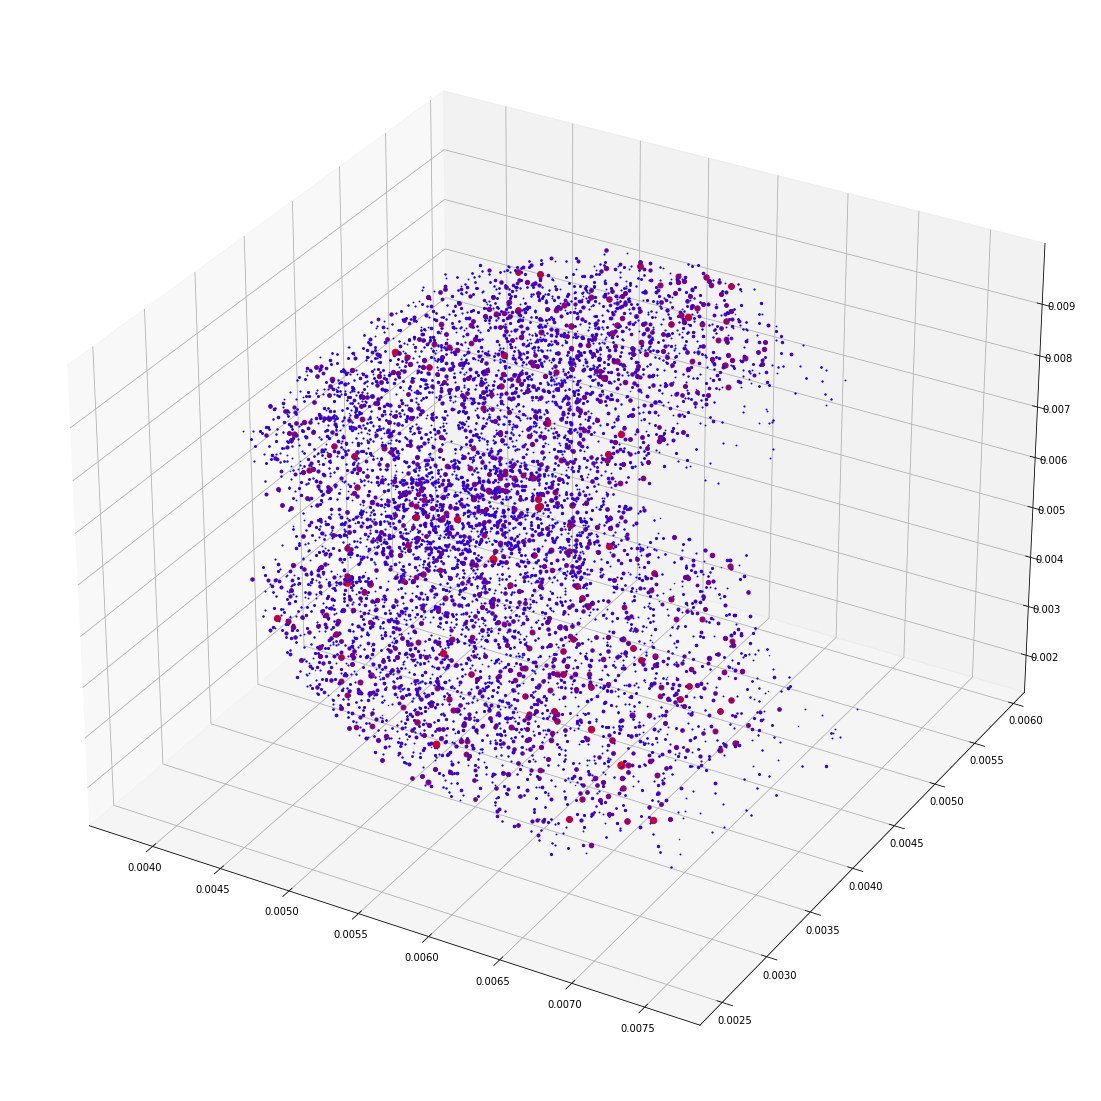

In [5]:
# show the connection number
from tqdm import tqdm
fig_conn = plt.figure(figsize=(20,20))
ax = fig_conn.add_subplot(111, projection='3d')
min_syn = 0
max_syn = 40
for line in tqdm(open(connection_file, "r")):
    id, con_in, syn_in, con_out, syn_out = line.split()
    if int(syn_in) > max_syn:
        max_syn = int(syn_in)
    x,y,z = location[int(id)]
    c = int(syn_in)
    ax.scatter(x,y,z, color=((c-min_syn)/(max_syn-min_syn), 0, 1-(c-min_syn)/(max_syn-min_syn)), marker='.', s=c**1.5)

In [6]:
# save the upper 3d figure as a rotating gif file
from matplotlib import animation 
def rotate(angle): 
    ax.view_init(azim=angle) 
rot_animation = animation.FuncAnimation(fig_conn, rotate, frames=np.arange(0,362,50),interval=1000) 
rot_animation.save('./connection.gif', dpi=300, writer='imagemagick') 
print("saved")

MovieWriter imagemagick unavailable; using Pillow instead.
saved


## 2. plot the voltage

In [3]:
import os
fig_volt = plt.figure('3D scatter plot')
ax = fig_volt.add_subplot(111, projection='3d')
#max_v = -120
#min_v = 120
minv = -120
maxv = 60
for i in range(2000):
    #ax.cla()
    for line in open(voltage_file, "r"):
        id = line.split(',')[0]
        if id != '-1':
            v = float(line.split(',')[i+3])
            x,y,z = location[int(id)]            
            #ax.scatter(x,y,z, color=((v-minv)/(maxv-minv),0,1-(v-minv)/(maxv-minv)), marker='o')
            #if v > max_v:
            #    max_v = v
            #if v < min_v:
            #    min_v = v
    #fig_volt.show()
    #os.system("pause")
print(min_v, max_v)
    

KeyboardInterrupt: 

In [3]:
# show the voltage
from matplotlib import animation 

def process_bar(percent, start_str='', end_str='', total_length=0):
    bar = ''.join(["\033[31m%s\033[0m"%'   '] * int(percent * total_length)) + ''
    bar = '\r' + start_str + bar.ljust(total_length) + ' {:0>4.1f}%|'.format(percent*100) + end_str
    print(bar, end='', flush=True)

fig_volt = plt.figure(figsize=(15,15))
ax = fig_volt.add_subplot(111, projection='3d')
def animate(i):
    process_bar(i/50., start_str='', end_str='100%', total_length=15)
    minv = -120
    maxv = 60
    for line in open(voltage_file, "r"):
        id = line.split(',')[0]
        if id != '-1':
            v = float(line.split(',')[i+3])
            x,y,z = location[int(id)]
            r = (v-minv)/(maxv-minv)
            if r < 0:
                r = 0
            elif r > 1:
                r = 1
            b = 1-r
            ax.scatter(x,y,z, color=(r,0,b), marker='.')
volt_animation = animation.FuncAnimation(fig_volt, animate, frames=np.arange(0,51,4),interval=1000) 
volt_animation.save('./10000_2ms_100ms_voltage.gif', dpi=100, writer='imagemagick') 
print("saved")

MovieWriter imagemagick unavailable; using Pillow instead.
                00.0%|100%

IndexError: list index out of range